In [10]:
import json
import glob
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Load data

In [11]:
def computeScore(runLog):
    return (runLog["WaypointsVisited"] - runLog["Steps"] / 1000.).mean()

def getMapName(path):
    rawName = os.path.splitext(os.path.basename(path))[0]
    # We now have ptsp_map$ID$, remove the ptsp_
    return rawName.split("_")[1]

# Gets the name of the algorithm and number of waypoints used from the filepath
def getFileData(filePath):
    fileName = os.path.splitext(os.path.basename(filePath))[0]
    algName, numWaypoints = fileName.split("_")
    return (algName, int(numWaypoints))

In [12]:
csvFiles = glob.glob("./*.csv")

algData = {}
for file in csvFiles:
    algName, numWaypoints = getFileData(file)
    if algName not in algData:
        algData[algName] = []
        
    algData[algName].append((file, numWaypoints))
    
# Sort the arrays in order of increasing waypoints
for alg in algData:
    algData[alg] = sorted(algData[alg], key=lambda x: x[1])
print(algData)

{'MS-MCTS': [('.\\MS-MCTS_1.csv', 1), ('.\\MS-MCTS_5.csv', 5), ('.\\MS-MCTS_10.csv', 10), ('.\\MS-MCTS_20.csv', 20), ('.\\MS-MCTS_30.csv', 30), ('.\\MS-MCTS_40.csv', 40), ('.\\MS-MCTS_50.csv', 50), ('.\\MS-MCTS_80.csv', 80), ('.\\MS-MCTS_100.csv', 100)], 'QD-MCTS-HP': [('.\\QD-MCTS-HP_1.csv', 1), ('.\\QD-MCTS-HP_5.csv', 5), ('.\\QD-MCTS-HP_10.csv', 10), ('.\\QD-MCTS-HP_20.csv', 20), ('.\\QD-MCTS-HP_30.csv', 30), ('.\\QD-MCTS-HP_40.csv', 40), ('.\\QD-MCTS-HP_50.csv', 50), ('.\\QD-MCTS-HP_80.csv', 80), ('.\\QD-MCTS-HP_100.csv', 100)], 'QD-MCTS': [('.\\QD-MCTS_1.csv', 1), ('.\\QD-MCTS_5.csv', 5), ('.\\QD-MCTS_10.csv', 10), ('.\\QD-MCTS_20.csv', 20), ('.\\QD-MCTS_30.csv', 30), ('.\\QD-MCTS_40.csv', 40), ('.\\QD-MCTS_50.csv', 50), ('.\\QD-MCTS_80.csv', 80), ('.\\QD-MCTS_100.csv', 100)], 'RB-MCTS': [('.\\RB-MCTS_1.csv', 1), ('.\\RB-MCTS_5.csv', 5), ('.\\RB-MCTS_10.csv', 10)], 'S-MCTS': [('.\\S-MCTS_1.csv', 1), ('.\\S-MCTS_5.csv', 5), ('.\\S-MCTS_10.csv', 10), ('.\\S-MCTS_20.csv', 20), ('.\\S

# Plot how the number of waypoints affects the score

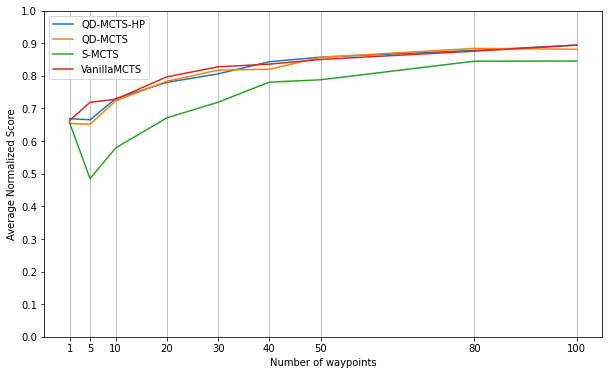

In [13]:
plt.figure(figsize=(10, 6))
for alg in algData:
    numWaypoints = []
    score = []
    for (fileName, maxWaypoints) in algData[alg]:
        numWaypoints.append(maxWaypoints)
        runData = pd.read_csv(fileName, delimiter="\t")
        score.append((computeScore(runData) + 1) / (maxWaypoints + 1))
    plt.plot(numWaypoints, score, label=alg)
    
plt.grid(axis="x")
plt.xticks(numWaypoints)
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.legend()
plt.ylabel("Average Normalized Score")
plt.xlabel("Number of waypoints")
plt.savefig("RandomizedWaypointsAvgScore.png", bbox_inches='tight')

# Plot how the number of waypoints affects the score per map

In [14]:
mapData = {}
for alg in algData:
    scorePerMap = {}
    for (fileName, maxWaypoints) in algData[alg]:
        runData = pd.read_csv(fileName, delimiter="\t")
        runData["MapName"] = [getMapName(name) for name in runData["MapName"]]
        
        for mapName, df in runData.groupby("MapName"):
            if mapName not in scorePerMap:
                scorePerMap[mapName] = []
            scorePerMap[mapName].append((computeScore(df) + 1) / (maxWaypoints + 1))
            
    mapData[alg] = scorePerMap

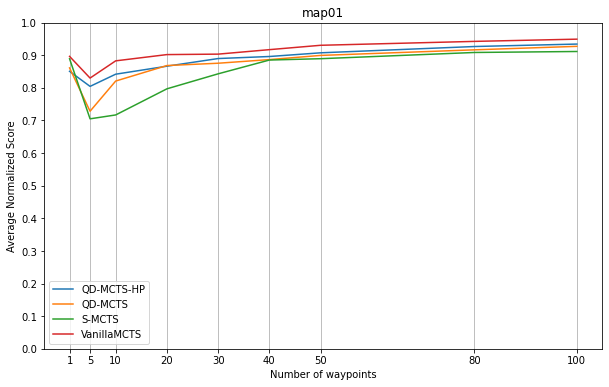

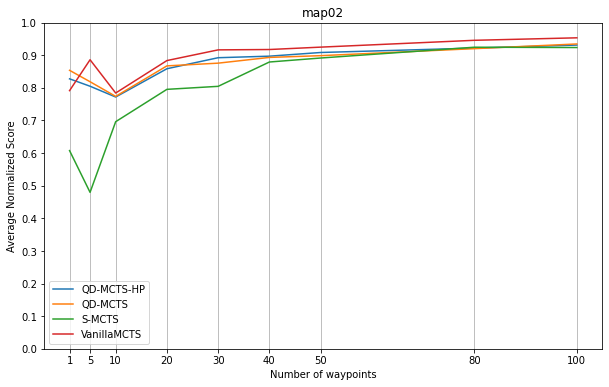

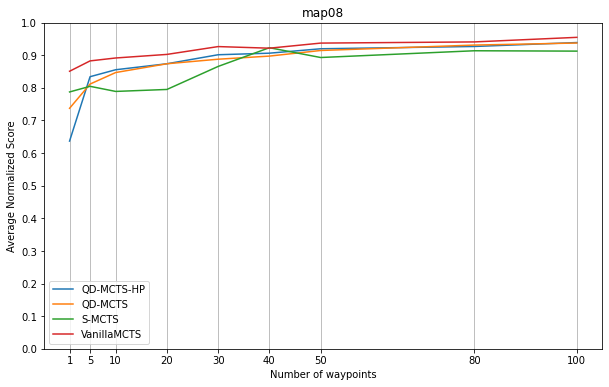

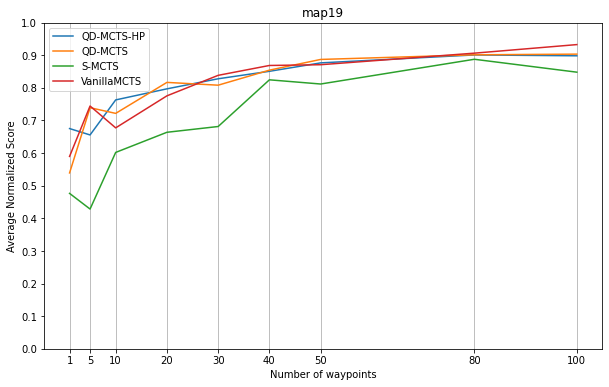

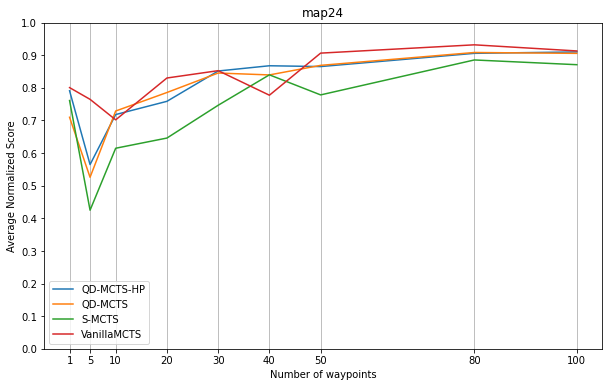

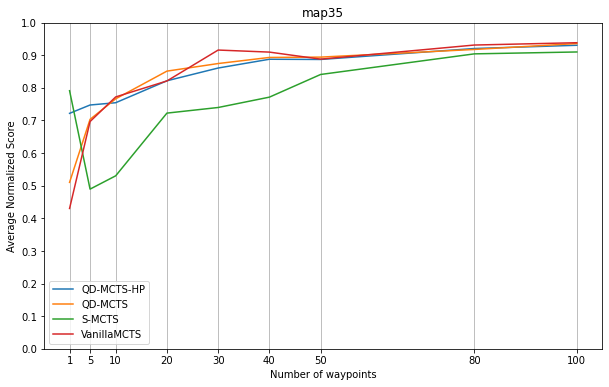

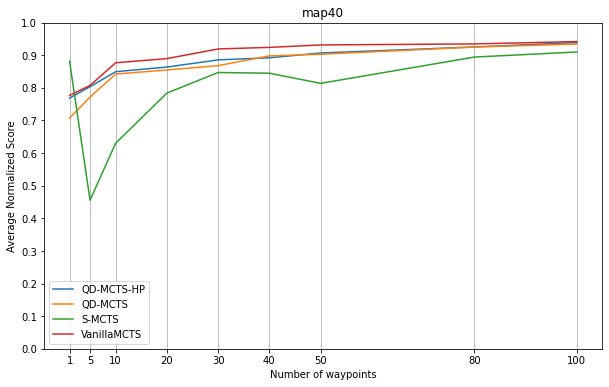

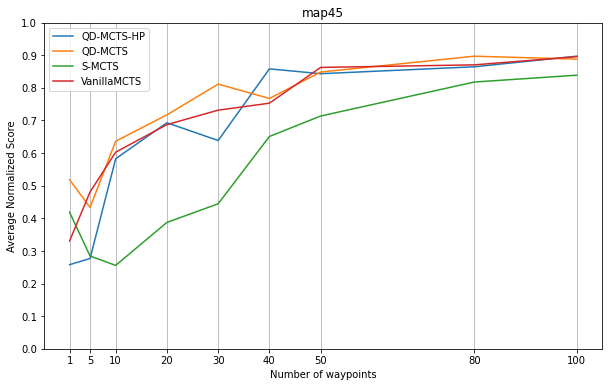

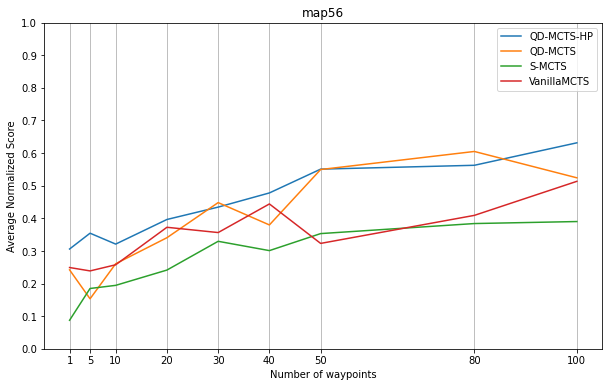

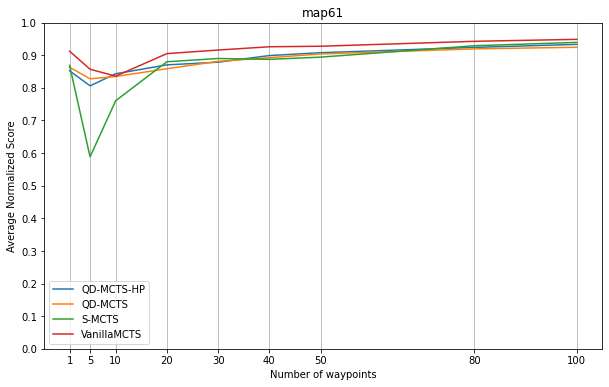

In [15]:
maps = [mapName for mapName in mapData["QD-MCTS"]]
for mapName in maps:
    plt.figure(figsize=(10, 6))
    plt.title(mapName)
    
    for alg in mapData:
        numWaypoints = [maxWaypoints for (_, maxWaypoints) in algData[alg]]
        plt.plot(numWaypoints, mapData[alg][mapName], label=alg)
    plt.legend()
    plt.grid(axis="x")
    plt.xticks(numWaypoints)
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    plt.legend()
    plt.ylabel("Average Normalized Score")
    plt.xlabel("Number of waypoints")
    plt.savefig(f"RandomizedWaypointsAvgScore_{mapName}.png", bbox_inches='tight')

# Plot waypoints visited & steps per map

In [16]:
mapData = {}
for alg in algData:
    dataPerMap = {}
    for (fileName, maxWaypoints) in algData[alg]:
        runData = pd.read_csv(fileName, delimiter="\t")
        runData["MapName"] = [getMapName(name) for name in runData["MapName"]]
        
        for mapName, df in runData.groupby("MapName"):
            if mapName not in dataPerMap:
                dataPerMap[mapName] = []
            dataPerMap[mapName].append((df, maxWaypoints))
            
    mapData[alg] = dataPerMap

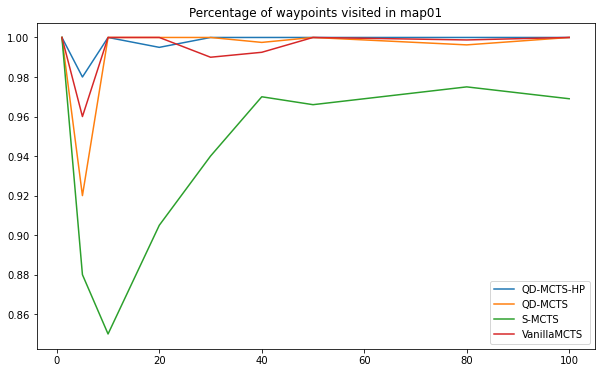

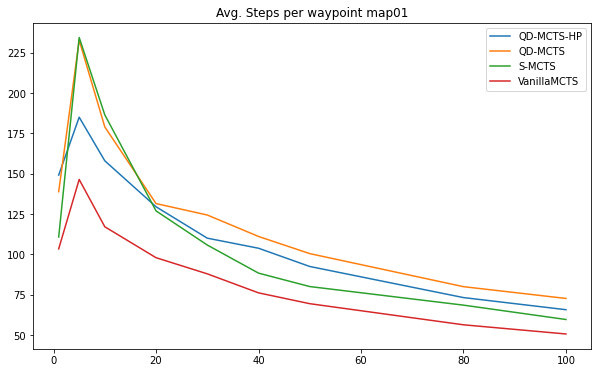

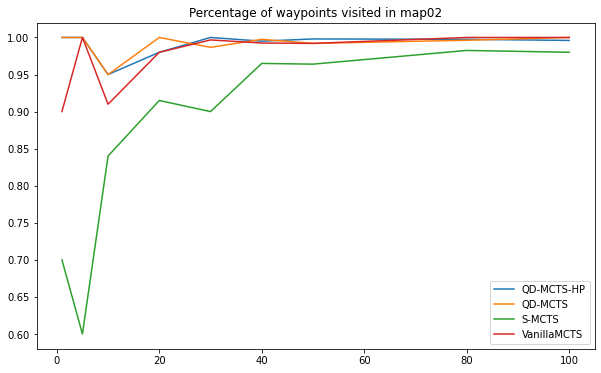

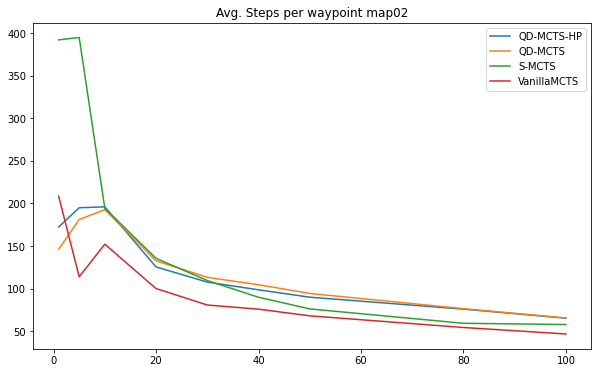

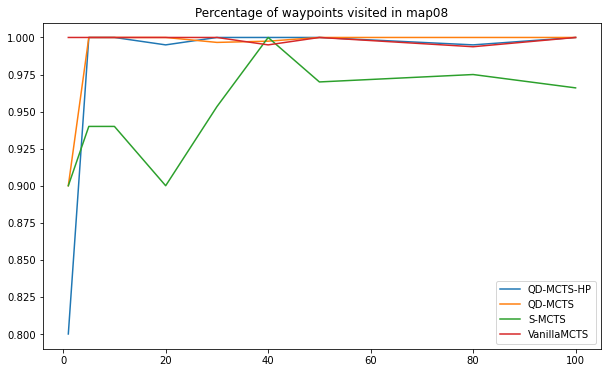

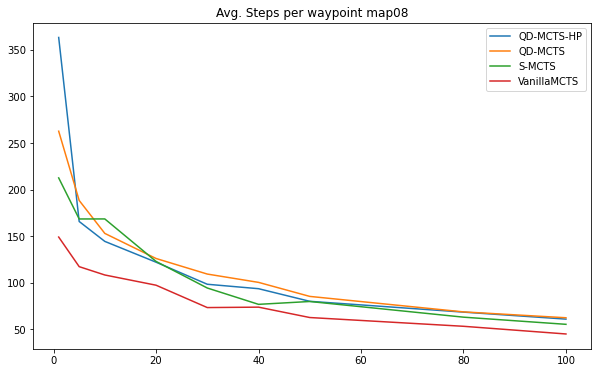

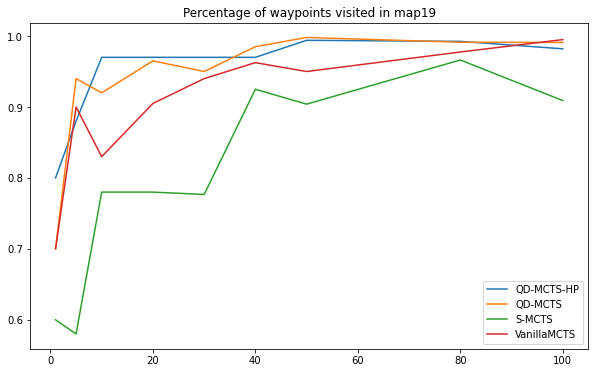

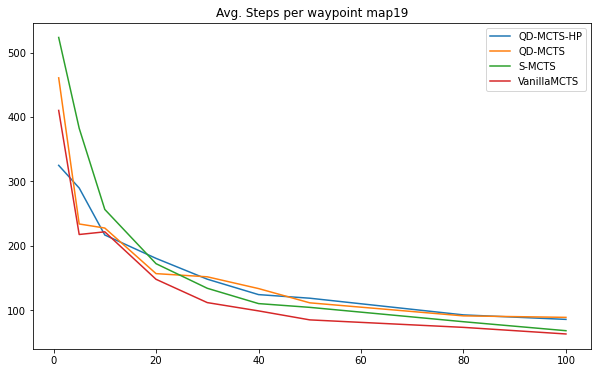

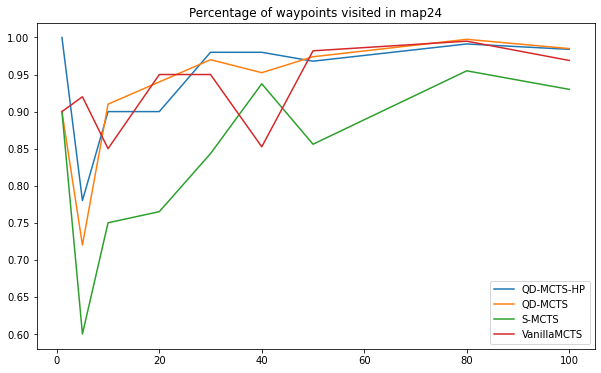

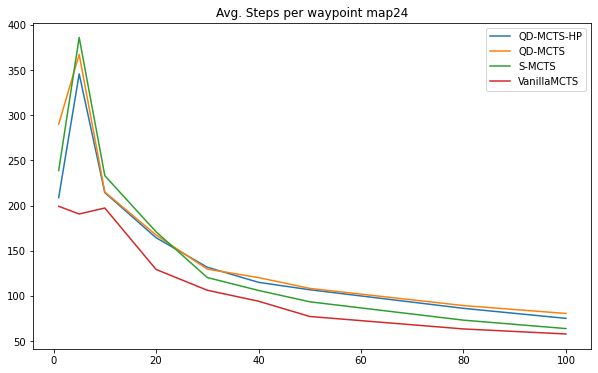

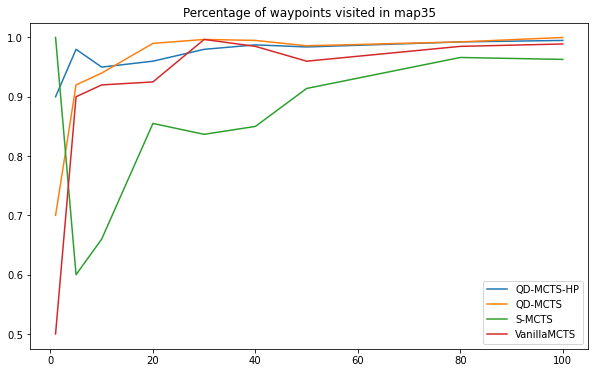

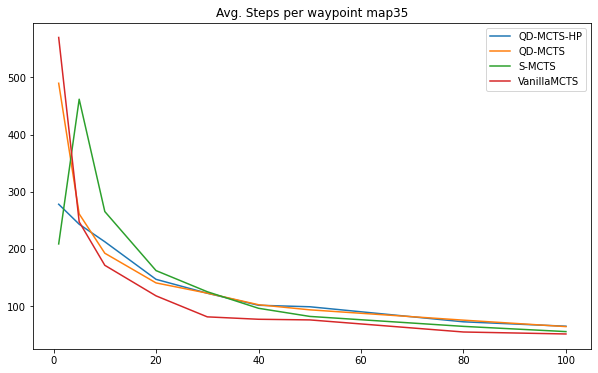

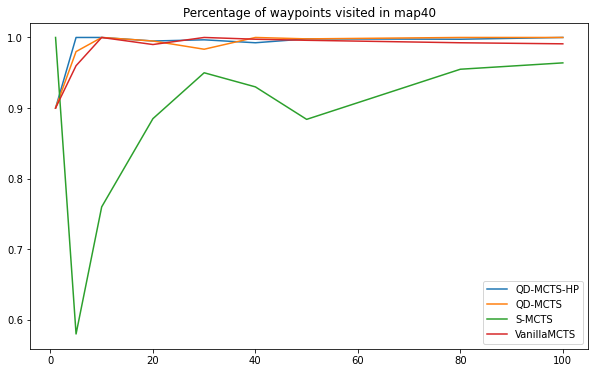

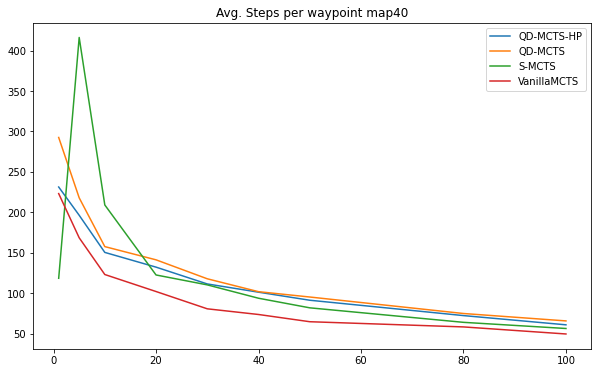

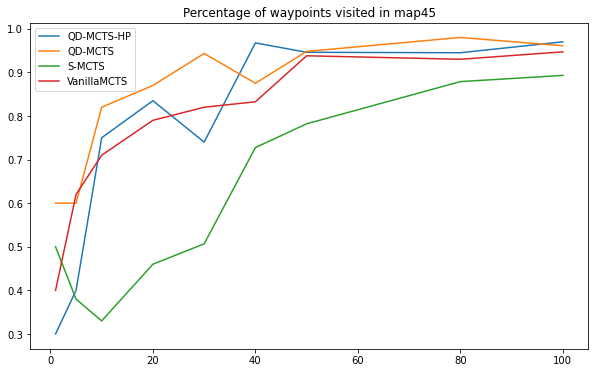

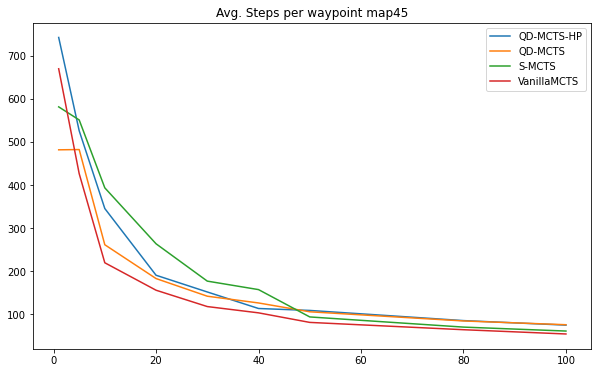

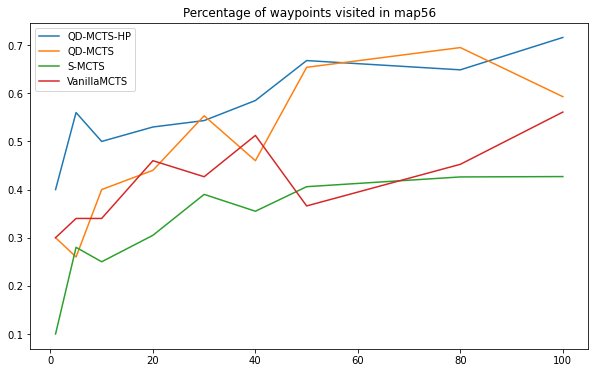

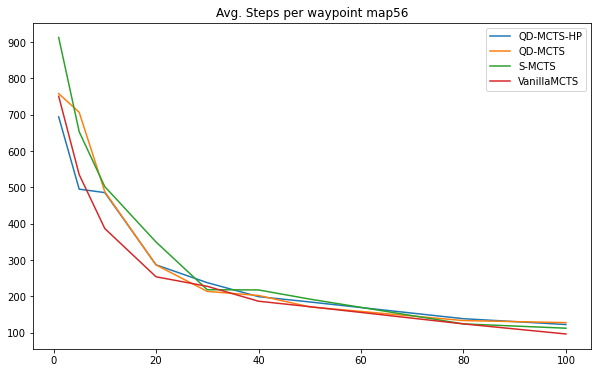

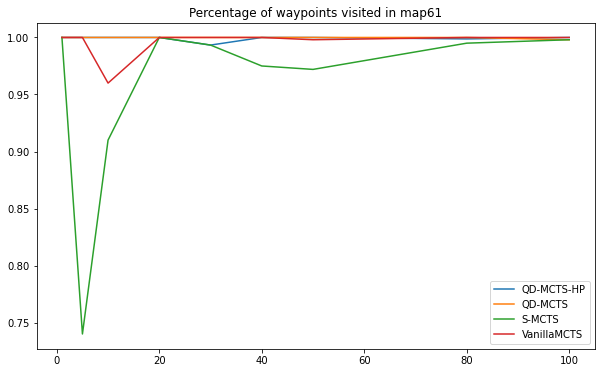

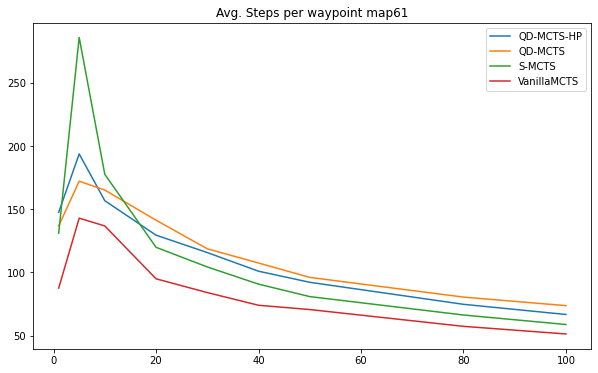

In [17]:
maps = [mapName for mapName in mapData["QD-MCTS"]]
for mapName in maps:
    plt.figure(figsize=(10, 6))
    plt.title(f"Percentage of waypoints visited in {mapName}")
    for alg in mapData:
        numWaypoints = [maxWaypoints for (_, maxWaypoints) in mapData[alg][mapName]]
        waypointsVisited = [(df["WaypointsVisited"] / maxWaypoints).mean() for (df, maxWaypoints) in mapData[alg][mapName]]
        plt.plot(numWaypoints, waypointsVisited, label=alg)
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.title(f"Avg. Steps per waypoint {mapName}")
    for alg in mapData:
        numWaypoints = [maxWaypoints for (_, maxWaypoints) in mapData[alg][mapName]]
        waypointsVisited = [(df["Steps"] / (df["WaypointsVisited"] + 1)).mean() for (df, maxWaypoints) in mapData[alg][mapName]]
        plt.plot(numWaypoints, waypointsVisited, label=alg)
    plt.legend()
    plt.show()